### Required Codio Assignment 16.1: Maximum Margin Classifier

**Expected Time = 30 minutes** 

**Total Points = 25** 

This activity focuses on basic maximum margin classifiers with the help of Scikit-Learn's `SVC` estimator.  Soon, you will dive deeper into the mechanics of the Support Vector Classifier.  To get started, you will use this as many other estimators and visualize the margins for the resulting classifier.  Specifically, we will examine the **support vectors** and see how we can use `SVC` to visualize boundaries for the maximum margin classifier.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### The Data

You will use the same synthetic data from the previous assignment and compare how the maximum margin classifier resulting from `SVC` looks under basic settings.  

In [4]:
X, y = make_blobs(cluster_std=2.0, centers = 2, random_state=42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

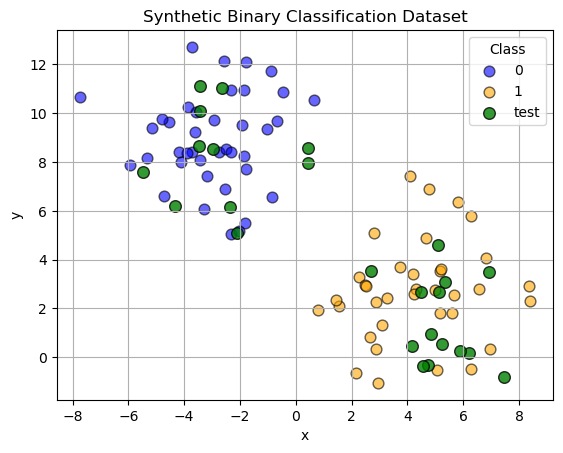

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X_train[y_train == label][:, 0], X_train[y_train == label][:, 1],
               c=color,
               label=label,
               alpha=0.6,
               edgecolor='black',
               s=60)
ax.scatter(X_test[:, 0], X_test[:, 1],
          c='green',
          label='test',
          alpha=0.8,
          edgecolor='black',
          s=70)

ax.legend(title = 'Class')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

[Back to top](#-Index)

### Problem 1

#### Fitting the `SVC`

**10 Points**

Instantiate the `SVC` estimator with a linear decision boundary `kernel = 'linear'` and fit it to your training data `X_train` and `y_train`. Assign this to the variable `svc_1` below. 


Next, examine the **support vectors** with the `.support_vectors_` attribute on `svc_1`, and assign this as a numpy array to `support_vectors`.


In [7]:
### GRADED
svc_1 = ''
support_vectors = ''

# YOUR CODE HERE
svc_1 = SVC(kernel='linear')
svc_1.fit(X_train, y_train)
support_vectors = svc_1.support_vectors_

### ANSWER CHECK
support_vectors

array([[-0.8641078 ,  6.57259883],
       [ 0.80233641,  1.92014193],
       [ 4.11056517,  7.41350802]])

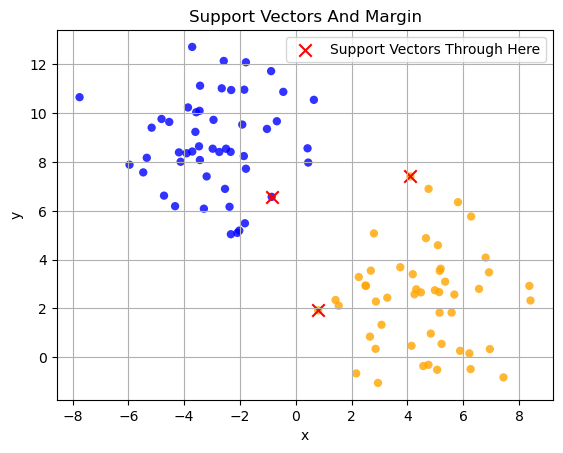

In [8]:
## Uncomment to visualize
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color,
               alpha=0.8, edgecolors='none')
ax.set_title('Support Vectors And Margin')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x', label = 'Support Vectors Through Here')
ax.grid(True)
ax.legend()

[Back to top](#-Index)

### Problem 2

#### Examining the resulting Margin

**10 Points**

As seen above, the results of the fit `SVC` contain points through which the **support vectors** pass.  


The points that determine this maximum margin pass through the support vectors.  Because these vectors are parallel to one another they share a slope.  

Using the `support_vectors` determine the slope of these lines and assign this to `slope2` below.  This will complete the functions `lower` and `upper` that determine a line between the two lower points for the support vectors and the one upper point. 


Uncomment the code to visualize your results.

In [13]:
### GRADED
slope2 = ''

# YOUR CODE HERE
slope2 = (support_vectors[2, 1] - support_vectors[1, 1]) / (support_vectors[2, 0] - support_vectors[1, 0])## ANSWER CHECK
def lower(x):
    return slope2*(x - support_vectors[2, 0]) + support_vectors[2, 1]
def upper(x):
    return slope2*(x - support_vectors[0, 0]) + support_vectors[0, 1]

Text(0.5, 1.0, 'Support Vectors')

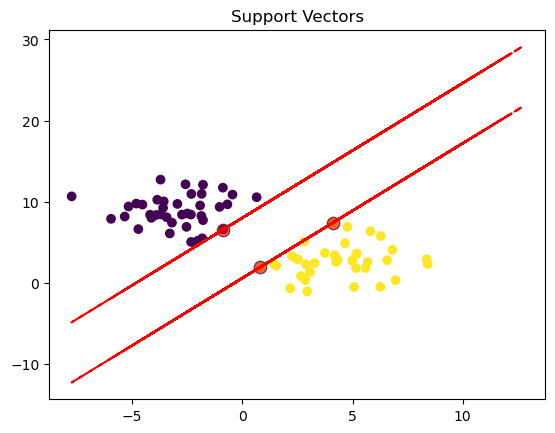

In [14]:
plt.plot(X, lower(X), '--r')
plt.plot(X, upper(X), '--r')
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], alpha = 0.6,color = 'red', s = 80, edgecolor = 'black')
plt.title('Support Vectors')

[Back to top](#-Index)

### Problem 3

#### Using the `decision_function` approach

**5 Points**

Similar to what you found using the slope of the line through the **support vectors**, the fit estimator can return information on these boundaries directly using the `.decision_function`.  Below, the `decision_function` is used to generate a contour plot of the support vectors and their midpoint.  The test data are plotted against the training data and support vectors.  

Based on this visualization did the Maximum Margin classifier misclassify any points? Note that the black line between the red support vectors is the decision boundary. Assign your answer as a boolean to `ans3` below.

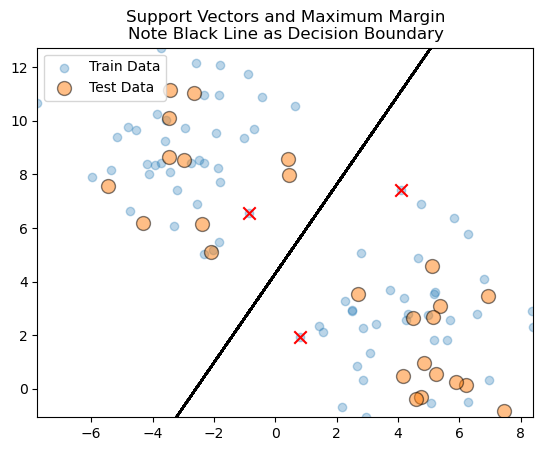

In [15]:
#Grid of points to plot decision boundaries
XX, YY = np.meshgrid(X_train[:, 0], X_train[:, 1])
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Output from grid of points based on decision function
Z = svc_1.decision_function(xy).reshape(XX.shape)
#Plots of points and support vectors
fig, ax = plt.subplots()
ax.contour(XX, YY,  Z, levels = [0], colors = ['black'])
ax.scatter(X_train[:, 0], X_train[:, 1], alpha = 0.3, label = 'Train Data')
ax.scatter(X_test[:, 0], X_test[:, 1], s = 100, alpha = 0.5, edgecolor = 'black', label = 'Test Data')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
ax.legend(loc = 'upper left')
ax.set_title('Support Vectors and Maximum Margin\nNote Black Line as Decision Boundary');

In [16]:
### GRADED
ans3 = '' #misclassified points -- True is yes/ False is no

# YOUR CODE HERE
ans3 = False

### ANSWER CHECK
print(ans3)

True


### Comparing Other Boundaries

Below, plotting both a `LogisticRegression` and a Quadratic boundary for a maximum margin classifier are shown.  Note how similar the linear `SVC` and `LogisticRegression` estimators are, while the quadratic boundary seems to be less effective than a linear boundary.  

Text(0.5, 1.0, 'Logistic Regression (red) vs. Linear SVC (black)')

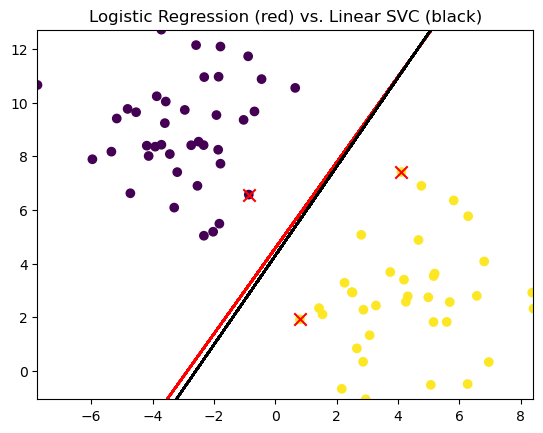

In [17]:
lgr = LogisticRegression().fit(X_train, y_train)
Z2 = lgr.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY,  Z2, levels = [0], colors = ['red'])
plt.contour(XX, YY,  Z, levels = [0], colors = ['black'])
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
plt.title('Logistic Regression (red) vs. Linear SVC (black)')

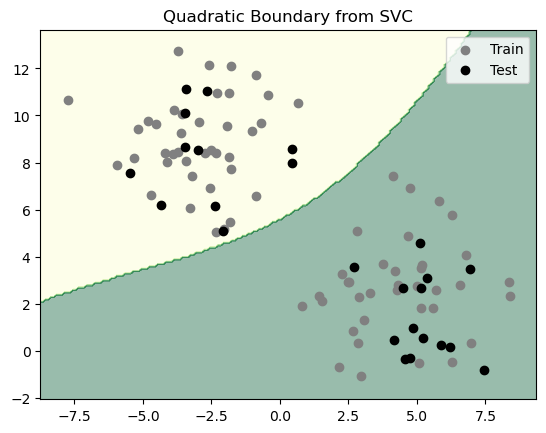

In [18]:
svc2 = SVC(kernel='poly').fit(X_train, y_train)
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z3 = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy,  Z3, cmap = 'YlGn', alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = 'grey', label = 'Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c = 'black', label = 'Test')
plt.legend()
plt.title('Quadratic Boundary from SVC');

### Summary of Maximum Margin Classifier Exercises

This notebook explored Support Vector Machines (SVM) using scikit-learn's `SVC` estimator through three main problems:

1. **Basic SVC Implementation**
   - Fitted an SVC with linear kernel to synthetic binary classification data
   - Examined support vectors using `.support_vectors_` attribute
   - Visualized the support vectors on the classification plot

2. **Margin Analysis**
   - Calculated slope between support vectors to understand margin boundaries
   - Implemented functions to plot upper and lower margin boundaries
   - Demonstrated how support vectors define the maximum margin

3. **Decision Function & Comparison**
   - Used `.decision_function()` to visualize decision boundaries
   - Compared SVC performance against test data
   - Contrasted linear SVC with Logistic Regression and quadratic SVM boundaries

### Key Takeaways:
- Support vectors are crucial points that define the maximum margin classifier
- Linear SVC and Logistic Regression produced similar decision boundaries
- Quadratic boundary (polynomial kernel) showed different behavior compared to linear models
- The maximum margin classifier effectively separated the classes without misclassifications
- Visualization techniques help understand classifier behavior and margin boundaries